In [74]:
# Create NN model using PyTorch
import torch
from torch import nn

class MLP_MNIST(nn.Module):
    def __init__(self, input_size, h1_size, h2_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(input_size, h1_size)
        self.layer2 = nn.Linear(h1_size, h2_size)
        self.layer_out = nn.Linear(h2_size, output_size)
        self.activation_fn = nn.Sigmoid()

    def flatten_mnist(self, x):
        result = self.flatten(x)[0]
        return result
        
    def forward(self, x):
        x = self.flatten_mnist(x)
        z1 = self.layer1(x)
        a1 = self.activation_fn(z1)
        z2 = self.layer2(z1)
        a2 = self.activation_fn(z2)
        z_out = self.layer_out(a2)
        y = nn.Softmax(dim=0)(z_out)
        return y

model_mnist = MLP_MNIST(784, 100, 100, 10)
print(model_mnist)

MLP_MNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer_out): Linear(in_features=100, out_features=10, bias=True)
  (activation_fn): Sigmoid()
)


In [75]:
# Load the MNIST handwritten number dataset by using PyTorch
import torch
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader

batch_size = 1
# Read the MNIST dataset by using torch and torchvision
# This will download the file to PATH if there's no dataset in the PATH
train_loader = DataLoader(
    MNIST('dataset', train=True, download=True,
          transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])),
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    MNIST('dataset', train=False, download=True,
          transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])),
    batch_size=batch_size,
    shuffle=True
)

# Our label is integer (0-9). So, we need a function to convert it into 1x10 vector
# example 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# example 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
def label_conversion_for_outputlayer(y):
    if y == 0:
        ret = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif y == 1:
        ret = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    elif y == 2:
        ret = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    elif y == 3:
        ret = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    elif y == 4:
        ret = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    elif y == 5:
        ret = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    elif y == 6:
        ret = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    elif y == 7:
        ret = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    elif y == 8:
        ret = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    elif y == 9:
        ret = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    return torch.Tensor(ret)
    

In [77]:
# Training
from torch.optim import SGD

# hyperparameters
learning_rate = 0.01
momentum = 0.01

# Loss function
loss_fn = nn.MSELoss(reduction='mean')
# Stochastic Gradient Descent (SGD) as optimizer in training procedure
# 
# v = momentum * v - lr * grad(w)
# w = w + v
optimizer = SGD(model_mnist.parameters(), lr=learning_rate, momentum=momentum)

num_epochs = 10
# Start iterate for model training
loss_arr = []
for epoch in range(num_epochs):
    for batch_idx, train_data in enumerate(train_loader):
        x_batch, y_batch = train_data
        # 0. Reset the gradients to zero
        optimizer.zero_grad()
        # 1. Generate predictions
        predict = model_mnist(x_batch)
        # 2. Calculate loss
        y = label_conversion_for_outputlayer(y_batch)
        loss = loss_fn(predict, y)
        # 3. Compute gradients
        loss.backward()
        # 4. Update parameters using gradients
        optimizer.step()
    print(f'Epoch {epoch} Loss {loss.item():.4f}')
    loss_arr.append(loss.item())

Epoch 0 Loss 0.0739
Epoch 1 Loss 0.0116
Epoch 2 Loss 0.0008
Epoch 3 Loss 0.0000
Epoch 4 Loss 0.0030
Epoch 5 Loss 0.1626
Epoch 6 Loss 0.0000
Epoch 7 Loss 0.0107
Epoch 8 Loss 0.0000
Epoch 9 Loss 0.0001


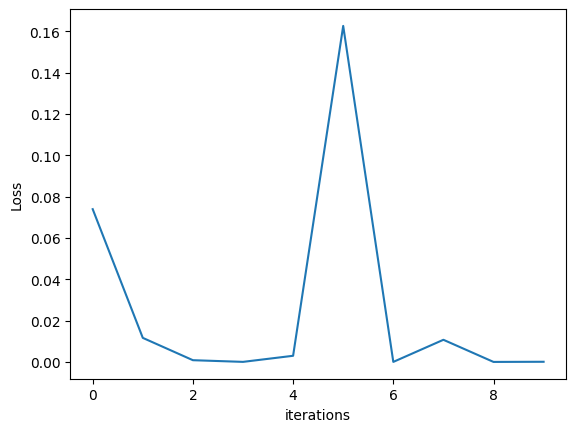

In [79]:
# Plot the epoch vs loss 
import matplotlib.pyplot as plt

plt.plot(list(range(num_epochs)), loss_arr)
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()

In [80]:
# Testing resulted model by measuring the accuracy
# accuracy = num of correction / num of total prediction

correct = 0
total = 0
for idx, test_data in enumerate(test_loader):
    x, actual = test_data
    predict = model_mnist(x)
    actual = label_conversion_for_outputlayer(actual)
    val_predict, indices_predict = torch.max(predict, 0)
    val_actual, indices_actual = torch.max(actual, 0)
    if indices_predict == indices_actual:
        correct += 1
    total += 1
print("number of correction=", correct, " out of ", total, ", accuracy=", correct/total)


number of correction= 9286  out of  10000 , accuracy= 0.9286


img/0.jpg , predicted number= 0
img/1.jpg , predicted number= 1
img/2.jpg , predicted number= 8
img/3.jpg , predicted number= 3
img/4.jpg , predicted number= 4
img/5.jpg , predicted number= 0
img/6.jpg , predicted number= 6
img/7.jpg , predicted number= 7
img/8.jpg , predicted number= 8
img/9.jpg , predicted number= 7


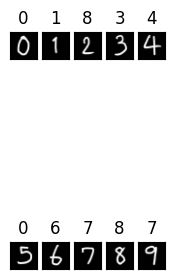

In [81]:
# Test with your own handwritten images.
import cv2
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(2, 5))
for i in range(1, 11):
    # Load image, Resize to 28x28, Invert and Normalize the pixel values
    path = 'img/' + str(i-1) + '.jpg'
    img_original = cv2.imread(path)
    img = cv2.resize(img_original, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.bitwise_not(img)
    img = img / 256
    ax = fig.add_subplot(2, 5, i)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img)
    
    # Convert numpy image into tensor image
    # Select only 1 channel of RGB images is enough.
    # Add dimension to image to have the same format as MNIST data which has 4 dimensions with unsqueeze()
    img = torch.Tensor(img[:,:,0])
    img = img.unsqueeze(0).unsqueeze(0)
    
    # Prediction
    predict = model_mnist.forward(img)
    val_predict, indices_predict = torch.max(predict, 0)
    print(path, ", predicted number=", int(indices_predict))
    plt.title(str(int(indices_predict)))


In [82]:
# Save the model in PyTorch .pth file with its current state
import torch
path = 'model_mnist.pth'
torch.save(model_mnist, path)

In [84]:
# Export ONNX formatted model from .pth model 
import torch

path = 'model_mnist.pth'
loaded_model = torch.load(path, weights_only=False)
loaded_model.eval()

input_size = 28*28
dummy_input = torch.rand(1, input_size)
input_names = ["input"]
output_names = ["output"]
torch.onnx.export(loaded_model,
                 dummy_input,
                 "model_mnist.onnx",
                 verbose=False,
                 input_names=input_names,
                 output_names=output_names,
                 export_params=True,
                 )